# Final Project: Personal Data Manifesto & Data Cookbook

## Your name: Ruth Iiyambo

### Your collaborators: Class TA

### Your sources: 
      

Due date: Thursday December 14 at 16:00 pm

## Part 0. Loading libraries


In [2]:
# Basic data libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json

from datetime import datetime, timezone

# Data visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Network analysis library
import networkx as nx

## 1. Data Cleaning Recipe:
Clean and preprocess data for analysis. Using pandas for handling missing values, filtering, and formatting date columns.

In [3]:
covid_data = pd.read_csv("owid-covid-data.csv")
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362236,ZWE,Africa,Zimbabwe,2023-12-02,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362237,ZWE,Africa,Zimbabwe,2023-12-03,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362238,ZWE,Africa,Zimbabwe,2023-12-04,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
362239,ZWE,Africa,Zimbabwe,2023-12-05,265927.0,0.0,0.0,5727.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [4]:
# Convert the 'date' column to datetime type
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Handle missing values by filling with 0 
covid_data.fillna(0, inplace=True)

# Filter the DataFrame for the years 2020 and 2021
covid_20_21 = covid_data[(covid_data['date'].dt.year >= 2020) & (covid_data['date'].dt.year <= 2021)]

# Show the cleaned and filtered data
covid_20_21

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,37.746,0.5,64.83,0.511,41128772.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361531,ZWE,Africa,Zimbabwe,2021-12-27,204351.0,605.0,1650.714,4891.0,6.0,14.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
361532,ZWE,Africa,Zimbabwe,2021-12-28,205449.0,1098.0,1481.429,4908.0,17.0,14.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
361533,ZWE,Africa,Zimbabwe,2021-12-29,207548.0,2099.0,1397.143,4940.0,32.0,17.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0
361534,ZWE,Africa,Zimbabwe,2021-12-30,209655.0,2107.0,1464.429,4967.0,27.0,19.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,0.0,0.0,0.0,0.0


Filtering dataset for Namibia as this was the years when the pandemic was at its peak.

In [5]:
# Filter the dataset for Namibia only
namibia_data = covid_20_21[covid_20_21['location'] == 'Namibia']
namibia_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
217204,NAM,Africa,Namibia,2020-01-03,0.0,0.0,0.000,0.0,0.0,0.000,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
217205,NAM,Africa,Namibia,2020-01-04,0.0,0.0,0.000,0.0,0.0,0.000,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
217206,NAM,Africa,Namibia,2020-01-05,0.0,0.0,0.000,0.0,0.0,0.000,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
217207,NAM,Africa,Namibia,2020-01-06,0.0,0.0,0.000,0.0,0.0,0.000,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
217208,NAM,Africa,Namibia,2020-01-07,0.0,0.0,0.000,0.0,0.0,0.000,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217928,NAM,Africa,Namibia,2021-12-27,146459.0,362.0,858.571,3613.0,2.0,3.429,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
217929,NAM,Africa,Namibia,2021-12-28,146720.0,261.0,810.714,3616.0,3.0,3.286,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
217930,NAM,Africa,Namibia,2021-12-29,147469.0,749.0,742.714,3623.0,7.0,3.714,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0
217931,NAM,Africa,Namibia,2021-12-30,147974.0,505.0,628.286,3633.0,10.0,4.571,...,34.2,44.6,0.0,63.71,0.646,2567024.0,0.0,0.0,0.0,0.0


## 2. Data Visualization Recipe:
Visualising the spread and its impact. Using libraries like matplotlib or seaborn for creating charts

In [6]:
# Convert the 'date' column to datetime
namibia_data['date'] = pd.to_datetime(namibia_data['date'])

/var/folders/6n/7sdxc_v955z_vc23f9jmhgy00000gn/T/ipykernel_8795/2754401869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  namibia_data['date'] = pd.to_datetime(namibia_data['date'])


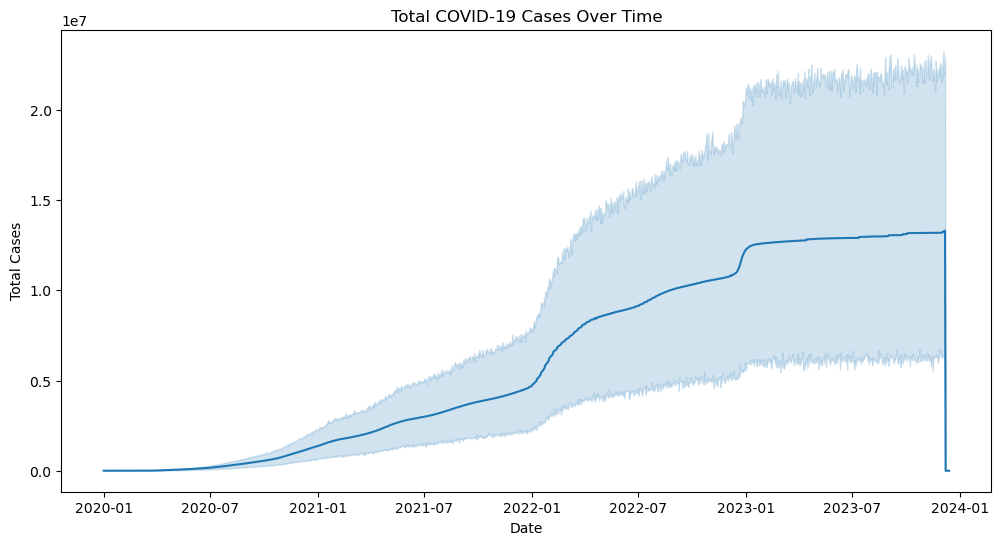

In [7]:
#Trend of Total Cases Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', data=covid_data)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
#plt.xticks(rotation=45)
plt.show()

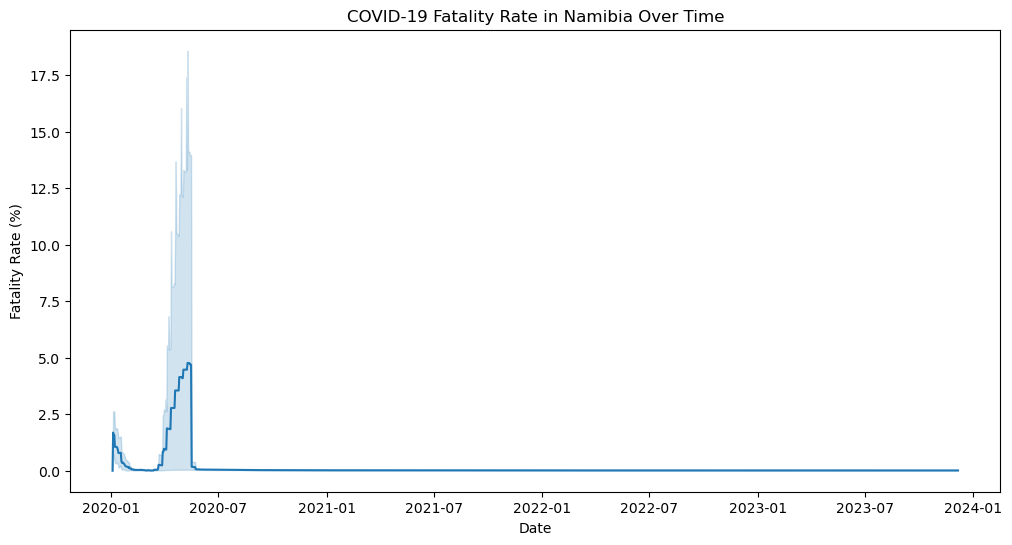

In [8]:
#Fatality Rate Over Time
covid_data['fatality_rate'] = covid_data['total_deaths'] / covid_data['total_cases']
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='fatality_rate', data=covid_data)
plt.title('COVID-19 Fatality Rate in Namibia Over Time')
plt.xlabel('Date')
plt.ylabel('Fatality Rate (%)')
#plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot Vaccination Progress
plt.figure(figsize=(12, 7))
plt.bar(covid_data['date'], covid_data['people_vaccinated'], color='green')
plt.title('Cumulative Vaccinations in Namibia Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of People Vaccinated')
#plt.xticks(rotation=45)
plt.show()

The first graph shows the total number of COVID-19 cases over time. The y-axis represents the total number of cases, while the x-axis shows the timeline from early 2020 to early 2024.The line in the graph represents the cumulative total of confirmed cases.

The second graph shows the fatality rate of COVID-19, represented as a percentage.There are spikes in the fatality rate, which correspond to outbreaks or periods with high mortality. After the initial spikes, the fatality rate seems to stabilize with some variability.

The third graph illustrates the cumulative number of COVID-19 vaccinations over time. The bars represent increments in the number of vaccinations administered, which grow over time, indicating the progress of the vaccination campaigns.

## 3. Comparative Analysis of COVID-19 Vaccination Rates: (propaganda)
Comparing vaccination rates across different countries.


In [10]:
# Determine the country with the highest weekly ICU admissions
max_icu_admissions_country = covid_data.loc[covid_data['weekly_icu_admissions'].idxmax()]
max_icu_admissions_country

iso_code                                                   FRA
continent                                               Europe
location                                                France
date                                       2020-04-03 00:00:00
total_cases                                               16.0
                                                  ...         
excess_mortality_cumulative_absolute                       0.0
excess_mortality_cumulative                                0.0
excess_mortality                                           0.0
excess_mortality_cumulative_per_million                    0.0
fatality_rate                                            169.5
Name: 109038, Length: 68, dtype: object

The code is used to determine the country with the highest weekly ICU admissions related to COVID-19.The country is France, with a date stamp of 2020-04-03, which is during the early phase of the global COVID-19 pandemic. France was one of the European countries where COVID-19 spread rapidly in the early months of 2020. The high number of cases would naturally lead to more severe cases requiring ICU admission.France had ramped up its testing capacity around this time, which may have led to a more accurate capture of the number of severe cases requiring ICU care compared to other countries with less testing.

In [11]:
# Zero admissions could mean no data reported, filter out such cases
covid_data_with_admissions = covid_data[covid_data['weekly_icu_admissions'] > 0]

# Determine the country with the lowest non-zero weekly ICU admissions
min_icu_admissions_country = covid_data_with_admissions.loc[covid_data_with_admissions['weekly_icu_admissions'].idxmin()]

min_icu_admissions_country


iso_code                                                   CHL
continent                                        South America
location                                                 Chile
date                                       2023-06-14 00:00:00
total_cases                                          5287185.0
                                                  ...         
excess_mortality_cumulative_absolute                       0.0
excess_mortality_cumulative                                0.0
excess_mortality                                           0.0
excess_mortality_cumulative_per_million                    0.0
fatality_rate                                         0.011635
Name: 62941, Length: 68, dtype: object

The code is filtering the dataset to exclude entries with zero weekly ICU admissions, which might indicate no data reported. After this filtering, the country with the lowest non-zero weekly ICU admissions is identified, which is Chile on the date 2023-06-14. Several NaN (Not a Number) values are visible in the output, which generally represent missing data for the specified fields like excess mortality. Chile might have had effective public health measures in place, such as social distancing, mask mandates, or lockdowns, which helped to keep the infection rate and thus the number of severe cases low.There's a possibility that the low number might be due to underreporting or delays in data collection. The NaN values for excess mortality suggest there could be gaps in the data.

In [12]:
# Group by 'location' and sum the 'weekly_icu_admissions'
grouped_data = covid_data.groupby('location')['weekly_icu_admissions'].sum().reset_index()

# Sort the grouped data to find top 7 countries with the highest sum of weekly ICU admissions
top_unique_icu_admissions_countries = grouped_data.sort_values('weekly_icu_admissions', ascending=False).head(7)

# Output the result
print("The top 7 unique countries with the highest weekly ICU admissions:")
print(top_unique_icu_admissions_countries)


The top 7 unique countries with the highest weekly ICU admissions:
        location  weekly_icu_admissions
76        France              1097842.0
82       Germany               677157.0
214        Spain               522417.0
43         Chile               400025.0
108        Italy               394130.0
55       Czechia               174262.0
155  Netherlands                85503.0


Some of these countries have dense urban areas where the virus can spread rapidly. Moreover, they might have well-established healthcare systems capable of reporting accurate data, which could partly explain the high numbers. Despite its successful vaccination campaign later on, Chile faced challenges with COVID-19 surges. Its inclusion on this list could be due to the timing of the data or the presence of variants that caused more severe illness.

In [13]:
# Exclude countries with zero admissions
grouped_data_non_zero = grouped_data[grouped_data['weekly_icu_admissions'] > 0]

# Sort the grouped data to find the bottom 7 countries with the lowest non-zero weekly ICU admissions
bottom_unique_icu_admissions_countries = grouped_data_non_zero.sort_values('weekly_icu_admissions', ascending=True).head(7)

# Output the result
print("The bottom 7 unique countries with the lowest non-zero weekly ICU admissions:")
print(bottom_unique_icu_admissions_countries)

The bottom 7 unique countries with the lowest non-zero weekly ICU admissions:
       location  weekly_icu_admissions
204   Singapore                  148.0
99      Hungary                  180.0
136       Malta                  266.0
129  Luxembourg                  807.0
126   Lithuania                  905.0
54       Cyprus                  995.0
67      Estonia                 1638.0


I was in Singapore during the peak times of the pandemic, 2020-2022. Singapore is known for its efficient healthcare system and public health measures, Singapore's effective contact tracing and isolation strategies may have kept the number of severe cases low. Malta being a small island country with a small population, the numbers of cases and ICU admissions would naturally be lower.

## 4. Economic Impact of Pandemics on Different Countries:
Analyzing the economic impact of COVID-19 using unemployment data.

In [14]:
unemployment_data = pd.read_csv("unemployment-rate-men-vs-women.csv")
unemployment_data

,Entity,Code,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1991,13.615,10.089,10745168.0,NaN
2,Afghanistan,AFG,1992,13.816,10.258,12057436.0,NaN
3,Afghanistan,AFG,1993,13.712,10.165,14003764.0,NaN
4,Afghanistan,AFG,1994,13.722,10.170,15455560.0,NaN
...,...,...,...,...,...,...,...
58573,Zimbabwe,ZWE,1986,NaN,NaN,8983048.0,NaN
58574,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58575,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN
58576,Zimbabwe,ZWE,1989,NaN,NaN,9846352.0,NaN


In [15]:
# Filter for Namibia data for the years 2020 to 2021
namibia_data_20_21 = unemployment_data[(unemployment_data['Entity'] == 'Namibia') & (unemployment_data['Year'].between(2020, 2021))]

# Output the filtered data
namibia_data_20_21

,Entity,Code,Year,"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)",Population (historical estimates),Continent
35591,Namibia,NAM,2020,20.148,22.697,2489099.0,NaN
35592,Namibia,NAM,2021,20.618,22.701,2530150.0,NaN


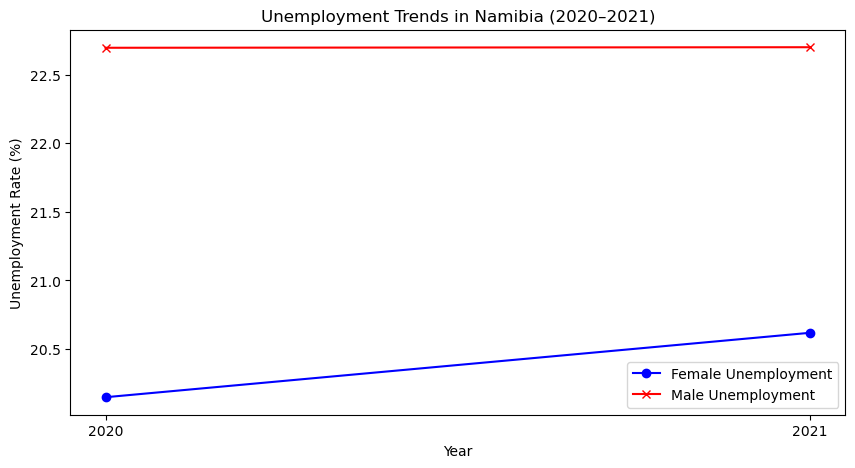

In [16]:
# Plotting the line graph
plt.figure(figsize=(10, 5))
plt.plot(namibia_data_20_21['Year'], namibia_data_20_21['Unemployment, female (% of female labor force) (modeled ILO estimate)'], label='Female Unemployment', marker='o', color='blue')
plt.plot(namibia_data_20_21['Year'], namibia_data_20_21['Unemployment, male (% of male labor force) (modeled ILO estimate)'], label='Male Unemployment', marker='x', color='red')

# Adding titles and labels
plt.title('Unemployment Trends in Namibia (2020–2021)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

# Setting x-ticks
plt.xticks(namibia_data_20_21['Year'])  # Ensures only the years in the dataset are used as x-ticks

# Adding a legend
plt.legend()

# Show plot
plt.show()

There are two lines, each representing the unemployment rate for males and females. The female unemployment rate is depicted by a blue line with circle markers, and the male unemployment rate is depicted by a red line with 'x' markers. Both lines appear to be horizontal, suggesting that the unemployment rates for both males and females did not change significantly between 2020 and 2021. This is different from all the news coverge about increased unemployment rates due to lockdowns, business closures, and reduced economic activity in Namibia. 

The female unemployment rate appears to be higher than the male unemployment rate for both years. This indicates a gender disparity in unemployment rates, with females being more affected than males.